In [1]:
import pandas as pd
import seaborn as sns

In [2]:
step_1 = pd.read_csv('step_1_lesson_7.csv')
step_2 = pd.read_csv('step_2_lesson_7.csv')
step_3 = pd.read_csv('step_3_lesson_7.csv')
step_4 = pd.read_csv('step_4_lesson_7.csv')

## Task 1

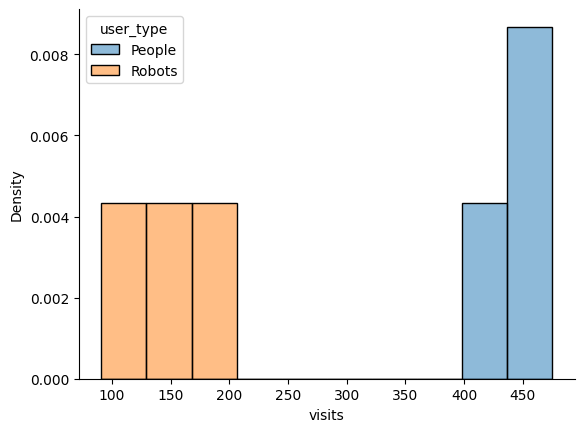

In [46]:
sns.histplot(data=step_1, x='visits', hue='user_type', stat='density', bins=10)
sns.despine()

## Task 2

In [21]:
step_2

,date,browser,visits
0,2020-06-15,Google Chrome,354.0
1,2020-06-15,Firefox,58.0
2,2020-06-15,Yandex Browser,54.0
3,2020-06-15,Safari,41.0
4,2020-06-15,Chrome Mobile,31.0
5,2020-06-15,Opera,16.0
6,2020-06-15,Mobile Safari,16.0
7,2020-06-15,Samsung Internet,9.0
8,2020-06-15,Edge,5.0
9,2020-06-15,UCWEB,4.0


In [ ]:
df = step_2
pd.crosstab( df['user_type'],
            df['browser'],
            values=df['visits'],
            aggfunc='sum',
            normalize=True).round(2)*100

KeyError: 'user_type'

In [64]:
(
    step_2
    .groupby('browser', as_index=False)
    .agg(visits = ('visits', 'sum'))
    .assign(perc = lambda x: x.visits.div(x.visits.sum()).multiply(100).round())
    .query("browser == 'Google Chrome'")
)
# answer - 60

,browser,visits,perc
6,Google Chrome,354.0,60.0


## Task 3

In [81]:
(
    step_3
    .groupby(['browser', 'user_type'], as_index=False)
    .agg(visits = ('visits', 'sum'))
    .pivot(index='browser', columns='user_type', values='visits')
    .reset_index()
    .fillna(0)
    .assign(people_perc = lambda p: p.People.div(p.People + p.Robots).multiply(100).round(),
            robots_perc = lambda r: r.Robots.div(r.People + r.Robots).multiply(100).round())
    .sort_values('robots_perc', ascending=False)
)

# answer - 'UCWEB'

user_type,browser,People,Robots,people_perc,robots_perc
11,UCWEB,0.0,4.0,0.0,100.0
9,Safari,19.0,22.0,46.0,54.0
5,Firefox,27.0,31.0,47.0,53.0
2,Chromium,1.0,1.0,50.0,50.0
8,Opera,11.0,5.0,69.0,31.0
6,Google Chrome,250.0,104.0,71.0,29.0
4,Edge,4.0,1.0,80.0,20.0
13,Yandex Browser,47.0,7.0,87.0,13.0
10,Samsung Internet,8.0,1.0,89.0,11.0
7,Mobile Safari,15.0,1.0,94.0,6.0


## Task 4
нужно найти долю заходов конкретных типов пользователей с конкретного браузера от вообще всех-всех заходов на сайт за этот день


In [108]:
(
    step_4
    .assign(total = step_4.groupby(['date', 'browser']).visits.transform('sum'),
            perc = lambda x: x.visits.div(x.total).round(1))
    .query("browser == 'Safari'")
)
# answer - 50%

,date,browser,user_type,visits,total,perc
6,2020-06-15,Safari,Robots,22.0,41.0,0.5
7,2020-06-15,Safari,People,19.0,41.0,0.5


## Task 5

In [7]:
to_gs = (
    step_4
    .assign(total = step_4.groupby(['date', 'browser']).visits.transform('sum'),
            perc = lambda x: x.visits.div(x.total).round(1))
    .query("browser == 'Safari'")
)

import gspread
from df2gspread import df2gspread as d2g
from oauth2client.service_account import ServiceAccountCredentials


# Specify path to your file with credentials
path_to_credential = 'proven-env-244304-7ccb7e1674df.json' 

scope = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']

credentials = ServiceAccountCredentials.from_json_keyfile_name(path_to_credential, scope)
gs = gspread.authorize(credentials)



In [18]:
spreadsheet_name = '1u89lpJag5C0qnBKr4i6YJ99NEhMUjhtOWIg-4a-EVA8'
sheet = 'Sheet1'
d2g.upload(to_gs, spreadsheet_name, sheet, credentials=credentials, row_names=False)


<Worksheet 'Sheet1' id:0>

## Task 6
В ответе укажите, сколько визитов на уникального пользователя совершается ботами с браузера Google Chrome (округлите до целого)



In [124]:
from io import BytesIO
import requests
r = requests.get('https://docs.google.com/spreadsheets/d/e/2PACX-1vQWMsvBTVio9C7IOOxfFO9C15BRHyME-_ENHqBodDOjuiHwk9fCuF5hUVmDs497PZOqPYK3exdSikOK/pub?gid=1006633900&single=true&output=csv')
data = r.content
df = pd.read_csv(BytesIO(data))

In [126]:
(
    df
    .merge(step_4, how='left', on=['date', 'browser', 'user_type'])
    .groupby(['browser', 'user_type'])
    .agg(users = ('users', 'sum'), visits = ('visits', 'sum'))
    .reset_index()
    .query("browser == 'Google Chrome'")
)

# answer - 1 (104/104)

,browser,user_type,users,visits
9,Google Chrome,People,240.0,250.0
10,Google Chrome,Robots,104.0,104.0
